In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('Dataset/Baby/BabyPre.csv')

In [ ]:
def f(row):
    val = (row['Group_number']-1)*10+row['Trial_number']
    return val
df['No.'] = df.apply(f, axis=1)


del df["Trial_number"]
del df["Group_number"]
del df["Position_number"]

In [ ]:
import numpy as np
df['time差']=0.000
df['time差'][1:]=np.diff(df['Time_stamp'])
df1=df.loc[df.Component_number == 176]
first=df1.groupby('No.').time差.head(1).index   #返回每个trail的第一个的索引
df1.loc[first,'time差']=0 #把每个trail变的位置，时间差都变成0
#df.groupby('No.').first().time差---检查一下 每一个确实都变成0了

In [ ]:
df1['Time']=df1.groupby('No.').time差.cumsum() 
df1['VelocityNew'] =  df1['Velocity'] - 64
df1['tempt']= df1['time差']*df1['VelocityNew']
df1['Pos'] = df1.groupby('No.')['tempt'].cumsum()
df1.groupby('No.').first()

In [ ]:
df2=df1[df1['Pos']<5]
#找出异常点的位置---df1[df1['Pos']>5].index
plt.plot(df2['Pos'],'purple')
plt.xlabel('t(ms)');plt.ylabel('Pos')

In [ ]:


plt.figure(4)
plt.subplot(2,3,1)

plt.suptitle('Platter Position for 5 Baby scratches', fontsize=16)

ax = plt.gca()
df3 = df2.loc[(df2['No.'] ==1 )]
df3.plot(kind='line',x='Time',y='Pos',ax=ax)


plt.subplot(2,3,2)
ax = plt.gca()
df4 = df2.loc[(df2['No.'] ==2 )]
df4.plot(kind='line',x='Time',y='Pos',ax=ax)


plt.subplot(2,3,3)
ax = plt.gca()
df5 = df2.loc[(df2['No.'] ==3 )]
df5.plot(kind='line',x='Time',y='Pos',ax=ax)

plt.subplot(2,3,4)
ax = plt.gca()
df6 = df2.loc[(df2['No.'] ==4 )]
df6.plot(kind='line',x='Time',y='Pos',ax=ax)


plt.subplot(2,3,5)
ax = plt.gca()
df7 = df2.loc[(df2['No.'] ==5 )]
df7.plot(kind='line',x='Time',y='Pos',ax=ax)



In [ ]:
df1

In [ ]:
df1.to_csv('NewestBaby.csv')

    
    
    
    
    
    从这里开始看就可以






In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math
f1 = pd.read_csv('./Rawdata/ChirpPre.csv')
f2 = pd.read_csv('./Rawdata/FlarePre.csv')
f3 = pd.read_csv('./Rawdata/StabPre.csv')


# f1 = pd.read_csv('Rawdata/ChirpPre.csv')
# f2 = pd.read_csv('Rawdata/FlarePre.csv')
# f3 = pd.read_csv('Rawdata/StabPre.csv')


def f(row):
    val = (row['Group_number'] - 1) * 10 + row['Trial_number']
    return val


f1['No.'] = f1.apply(f, axis=1)
f2['No.'] = f2.apply(f, axis=1)
f3['No.'] = f3.apply(f, axis=1)


def shanchu(x):
    del x["Trial_number"]
    del x["Group_number"]
    del x["Position_number"]
    return x


# f1=shanchu(f1)
# f2=shanchu(f2)
# f3=shanchu(f3)
import numpy as np
from itertools import groupby


def get_data(raw_data, component_num):
    result = []
    for idx, row in f1.iterrows():
        if row['Component_number'] == component_num:
            result.append(row)
    result2 = []
    result2.append(result[0])
    for i  in range(1, int(len(result))):
        if result[i]['Time_stamp'] == result2[-1]['Time_stamp']:
            pass
        else:
            result2.append(result[i])
    return result2


def print_data(data_for_182, i):
    print('Component_number', 'Position_number', 'Time_stamp')
    print(data_for_182[i]['Component_number'], data_for_182[i]['Position_number'], data_for_182[i]['Time_stamp'])


# 3. 取类别每组的最大time stamp
def get_each_type_of_group_max_time_stamp(data):
    max_time_stamp_by_group = []
    time_stamp_group = groupby(data, key=lambda x: x['No.'])
    for key, group in time_stamp_group:
        g = list(group)
        max_value = max(g, key=lambda item: item[3])
        max_time_stamp_by_group.append(max_value['Time_stamp'])
    return max_time_stamp_by_group


def data_pro(data):
    # 1. 得到组件数据
    data_for_182 = get_data(data, 182)
    data_for_176 = get_data(data, 176)

    # 2. 计算position 并 取一行
    data_uniq_for_182 = []
    
    for i in range(0, int(len(data_for_182)), 2):
        x = data_for_182[i]['Velocity']
        y = data_for_182[i + 1]['Velocity']
        pos = (x + y / 128) / 100
        data_for_182[i]['Position'] =  pos
        data_for_182[i + 1]['Position'] = pos
        data_uniq_for_182.append(data_for_182[i])

#     for i in range(len(data_uniq_for_182)):
#         print(list(data_uniq_for_182[i]))
    data_uniq_for_176 = []
    sum_data = 0
    no = 1
    for i in range(1, len(data_for_176) - 1, 1):
        if i == 1:
            data_for_176[0]['Position'] = 0
            data_uniq_for_176.append(data_for_176[0])
        if data_for_176[i]['No.'] == no:
            vel = data_for_176[i]['Velocity']
            pos = (int(vel) - 64) * (float(data_for_176[i]['Time_stamp']) - float(data_for_176[i-1]['Time_stamp']))
            data_for_176[i]['Position'] = sum_data + pos
            sum_data += pos
            data_uniq_for_176.append(data_for_176[i])
        else:
            sum_data = 0
            vel = data_for_176[i]['Velocity']
            pos = (int(vel) - 64) * (float(data_for_176[i]['Time_stamp']) - float(data_for_176[i - 1]['Time_stamp']))
            data_for_176[i]['Position'] = sum_data + pos
            sum_data += pos
            data_uniq_for_176.append(data_for_176[i])
            no += 1

    for i in range(len(data_uniq_for_176)):
        print(list(data_uniq_for_176[i]))
    # 融合每组数据
    list_group = []
    for i in range(50):
        no = i + 1
        group = []
        group_182 = []
        group_176 = []
        for j in range(len(data_uniq_for_182)):
            if data_uniq_for_182[j]['No.'] == no:
                group.append(data_uniq_for_182[j])
                group_182.append(data_uniq_for_182[j])
        for j in range(len(data_uniq_for_176)):
            if data_uniq_for_176[j]['No.'] == no:
                group.append(data_uniq_for_176[j])
                group_176.append(data_uniq_for_176[j])

        group_182.sort(key=lambda x: x['Time_stamp'])
        group_176.sort(key=lambda x: x['Time_stamp'])
        group.sort(key=lambda x: x['Time_stamp'])

        first = group[0]
        start_time = min(group_182[0]['Time_stamp'], group_176[0]['Time_stamp'])
        step = 0.001
        end_182 = len(group_182) - 1
        end_176 = len(group_176) - 1
        end_time = max(group_182[end_182]['Time_stamp'], group_176[end_176]['Time_stamp'])

        result = []
        m = 0
        n = 0
        error = 0.0001
        size = int((end_time - start_time) / step)
        for v in range(size):
            current_time = start_time + step * v
            if math.isclose(group_176[m]['Time_stamp'],current_time) and math.isclose(group_182[n]['Time_stamp'], current_time):
                result.append(group_176[m])
                result.append(group_182[n])
                if m + 1 < len(group_176):
                    m += 1
                if n + 1 < len(group_182):
                    n += 1
            
            elif math.isclose(group_176[m]['Time_stamp'] ,current_time) and math.isclose(group_182[n]['Time_stamp'], current_time)== False:
                result.append(group_176[m])
                if m + 1 < len(group_176):
                    m += 1
                temp = copy.copy(group_182[n])
                temp['Time_stamp'] = current_time
                result.append(temp)
            elif math.isclose(group_176[m]['Time_stamp'] ,current_time)==False and math.isclose(group_182[n]['Time_stamp'] ,current_time):
                result.append(group_182[n])
                if n + 1 < len(group_182):
                    n += 1
                temp = copy.copy(group_176[m])
                temp['Time_stamp'] = current_time
                result.append(temp)
            else:
                temp = copy.copy(group_176[m])
                temp['Time_stamp'] = current_time
                result.append(temp)

                temp = copy.copy(group_182[n])
                temp['Time_stamp'] = current_time
                result.append(temp)
            
                


        result.sort(key=lambda x: x['Time_stamp'])
        for i in range(len(result)):
            list_group.append(result[i])
#         df = pd.DataFrame(result)
#         print(df.head())
    

    return pd.DataFrame(list_group)


cfChirp = data_pro(f1)


print(cfChirp.head())
cfChirp.to_csv('cfChirp_merge.csv')

/var/folders/f4/yjj__yrs769f3dxf7ldkynmr0000gn/T/ipykernel_98811/1435013551.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_df = df[['Time_stamp', 'Position','No.']][df['No.'] == 1][df['Component_number'] == 176]


<AxesSubplot:xlabel='Time_stamp'>

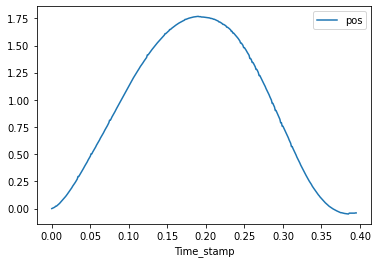

In [12]:
import pandas as pd
df = pd.read_csv('cfChirp_merge.csv')
sub_df = df[['Time_stamp', 'Position','No.']][df['No.'] == 1][df['Component_number'] == 176]
# save(sub_df,'cfchirp1.csv')
ax = plt.gca()
cf1 = sub_df.loc[(sub_df['No.'] ==1 )]
cf1.plot(kind='line',x='Time_stamp',y='Position',ax=ax,label="pos")

In [66]:
import pandas as pd
import tslearn.metrics as ts
def align_gen(file1,no1,file2,no2):
    df1 = pd.read_csv(file1)
    sub_df1 = df1[['Time_stamp', 'Position','No.']][df1['No.'] == no1][df1['Component_number'] == 182]
    pos1 = sub_df1.iloc[:,1].values
    pos1 = pos1 - pos1[0]
    # 让pos都从0开始，为了消除之前第二组会从第一组的最后一个数开始算的影响
    df2 = pd.read_csv(file2)
    sub_df2 = df2[['Time_stamp', 'Position','No.']][df2['No.'] == no2][df2['Component_number'] == 182]
    pos2 = sub_df2.iloc[:,1].values
    os2 = pos2 - pos2[0]
    align, dist = ts.dtw_path(pos1,pos2)
    # 这个是求相似程度的函数，align是怎么把两组数据变形，dist是相似程度的指标
    # https://tslearn.readthedocs.io/en/latest/gen_modules/metrics/tslearn.metrics.dtw_path.html
    return align
    # 读取test和train的182数据，然后求出让两组数据最相合的alignment（可以理解为在适当的地方延长来让他俩长的一样）

a = align_gen('cfChirp_merge.csv',1,'cfChirp_merge.csv',4)
# 记录这个变形方法，就是两组数据分别哪里需要延长

def align_project(align,file1,no1,file2,no2,comp):
    df1 = pd.read_csv(file1)
    sub_df1 = df1[['Time_stamp', 'Position','No.']][df1['No.'] == no1][df1['Component_number'] == comp]
    pos1 = sub_df1.iloc[:,1].values
    pos1 = pos1 - pos1[0]
    df2 = pd.read_csv(file2)
    sub_df2 = df2[['Time_stamp', 'Position','No.']][df2['No.'] == no2][df2['Component_number'] == comp]
    pos2 = sub_df2.iloc[:,1].values
    pos2 = pos2 - pos2[0]
    alignedp1 = []
    alignedp2 = []
    for i in range(0,len(a)):
        alignedp1.append(pos1[a[i][0]])
        alignedp2.append(pos2[a[i][1]])
    return pos1,pos2,alignedp1,alignedp2
    # 把这个变形方法应用到同一个test和train的176的数据上
    # align里面长这样：（0，0），（0，1）就表示第一项和第一项对应，test的第一项和train的第二项也对应，所以就把test的第一项延长
    # 可以看一下下面的图，变形之后两个pos会变成一样长，而且都比原来长
    

pos1,pos2,p1,p2 = align_project(a,'cfChirp_merge.csv',1,'cfChirp_merge.csv',4,176)
pos11,pos22,p11,p22 = align_project(a,'cfChirp_merge.csv',1,'cfChirp_merge.csv',4,182)

dist = ts.dtw(p1,p2)
# 计算出176的数据按同样的方法变形后，相差多少（长得有多像），这个dist越小说明越像


/var/folders/f4/yjj__yrs769f3dxf7ldkynmr0000gn/T/ipykernel_98811/266364956.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_df1 = df1[['Time_stamp', 'Position','No.']][df1['No.'] == no1][df1['Component_number'] == 182]
/var/folders/f4/yjj__yrs769f3dxf7ldkynmr0000gn/T/ipykernel_98811/266364956.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_df2 = df2[['Time_stamp', 'Position','No.']][df2['No.'] == no2][df2['Component_number'] == 182]
/var/folders/f4/yjj__yrs769f3dxf7ldkynmr0000gn/T/ipykernel_98811/266364956.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_df1 = df1[['Time_stamp', 'Position','No.']][df1['No.'] == no1][df1['Component_number'] == comp]
/var/folders/f4/yjj__yrs769f3dxf7ldkynmr0000gn/T/ipykernel_98811/266364956.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_df2 = df2[['Time_stamp', 'Position','No.']][df2['No.'] == no

In [67]:
dist

4.627286894066835

Text(0.5, 1.0, 'Original')

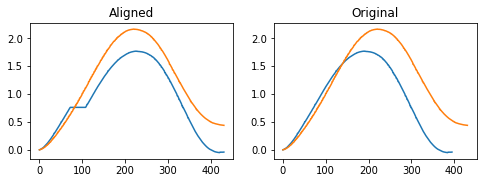

In [63]:
import matplotlib.pyplot as plt
# x = range(len(p1))
# subplot(1,2,1)
# plt.plot(p1)
# plt.plot(p2)
# plt.show()
fig, axes = plt.subplots(ncols=2, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2, sharex=ax[0], sharey=ax[0])

ax[0].plot(p1)
ax[0].plot(p2)
ax[0].set_title('Aligned')



ax[1].plot(pos1)
ax[1].plot(pos2)
ax[1].set_title('Original')


Text(0.5, 1.0, 'Original')

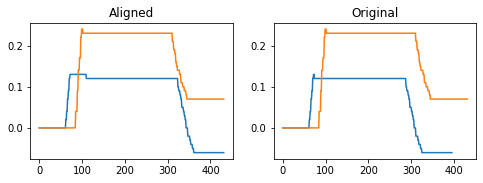

In [64]:

fig, axes = plt.subplots(ncols=2, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2, sharex=ax[0], sharey=ax[0])

ax[0].plot(p11)
ax[0].plot(p22)
ax[0].set_title('Aligned')



ax[1].plot(pos11)
ax[1].plot(pos22)
ax[1].set_title('Original')


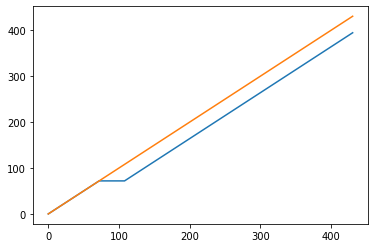

In [65]:
plt.plot(a)

/var/folders/f4/yjj__yrs769f3dxf7ldkynmr0000gn/T/ipykernel_98811/3099760239.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_df = df[['Time_stamp', 'Position','No.']][df['No.'] == 1][df['Component_number'] == 182]


<AxesSubplot:xlabel='Time_stamp'>

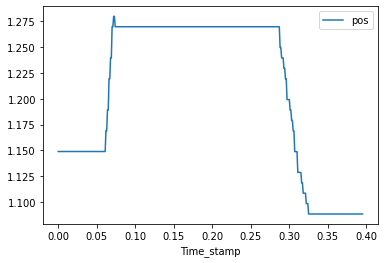

In [13]:
import pandas as pd
df = pd.read_csv('cfChirp_merge.csv')
sub_df = df[['Time_stamp', 'Position','No.']][df['No.'] == 1][df['Component_number'] == 182]
# save(sub_df,'cfchirp1.csv')
ax = plt.gca()
cf1 = sub_df.loc[(sub_df['No.'] ==1 )]
cf1.plot(kind='line',x='Time_stamp',y='Position',ax=ax,label="pos")

In [ ]:
# cfChirp
del cfChirp['Velocity']
del cfChirp['Position_number']
del cfChirp['Trial_number']
del cfChirp['Group_number']
del cfChirp['time差']
del cfChirp['VelocityNew']
del cfChirp['tempt']
cfChirp

In [ ]:
del plChirp['Velocity']
del plChirp['Position_number']
del plChirp['Trial_number']
del plChirp['Group_number']
del plChirp['time差']
del plChirp['VelocityNew']
del plChirp['tempt']
plChirp

    需求：1) 根据原表，找到每一个No.对应的Max(Time_Stamp)  
            比如 Max(Time_Stamp_cfChirp)= 0.34，Max(Time_Stamp_plChirp)=0.448 
                ---->  Max(Time_Stamp)=0.448
         1）让Time_Stamp列的间隔为0.001, 且都从0.000开始
         2）每一个No.补充到Max(Time_Stamp) 
         3) 每个时间出现1次,如果没有对应Time_Stamp的Pos
                                 0开始：填上最近的下一个Pos的值
                                 其他：保持上一时刻的值
         4) 每个存两个新的csv ，有Time_Stamp     No.        Pos 三列 
                 ----->分别名为cfChirpNew，plChirpNew
                 ----->分别名为cfFlareNew，plFlareNew
                 ----->分别名为cfStabNew，plStabNew
         * 务必确保每一对的两个csv有同样的行数，共6个。
         
         
        举例：
        
    cfChirpNew      Time_Stamp     No         Pos                       
                    0.000           1         1.149766        
                    0.001           1         1.149766
                    0.002           1         1.149766
                    0.003           1         1.149766
                    .               1         1.149766
                    .               1         1.149766
                    .               1         1.149766
                    0.061           1         1.149766
                    0.062           1         1.154844
                    .               .         .
                    .               .         .
                    .               .         .
                    .               .         .
                    0.000           2         .
                    0.001           2         .
                    0.002           2         .
                    0.003           2         .
                    .               .         .
                    .               .         .
                    .               .         .
                    .               .         .
                    0.343           50        1.052188
                    0.344           50        1.052188
                    .               50        1.052188
                    .               50        1.052188
                    0.448           50        1.052188
                    
                    
                    
    plChirpNew      Time_Stamp     No         Pos                       
                    0.000           1         0.000       
                    0.001           1         0.003
                    0.002           1         0.007
                    0.003           1         0.010
                    .               .         .
                    .               .         .
                    0.000           2         .
                    0.001           2         .
                    0.002           2         .
                    0.003           2         .
                    .               .         .
                    .               .         .
                    .               .         .
                    .               .         .
                    .               .         .
                    0.445           50        0.481
                    0.446           50        0.481
                    0.447           50        0.483
                    0.448           50        0.484

In [ ]:

df = pd.read_csv('cfChirp.csv')
sub_df = df[['Time_stamp', 'Pos','No.']][df['No.'] == 1]

# save(sub_df,'cfchirp1.csv')
ax = plt.gca()
cf1 = sub_df.loc[(sub_df['No.'] ==1 )]
cf1.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="cf")

In [ ]:
df = pd.read_csv('plChirp.csv')
sub_df = df[['Time_stamp', 'Pos','No.']][df['No.'] == 1]
# save(sub_df,'cfchirp1.csv')
ax = plt.gca()
cf1 = sub_df.loc[(sub_df['No.'] ==1 )]
cf1.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="pl")

         可以画图检验

          
          
          
          不用往下看了
          
          
          
          

In [ ]:
import pandas as pd
df = pd.read_csv('cfChirp.csv', skipinitialspace=True, usecols=[4,12])
df['dates'] = pd.to_datetime(df['Time_stamp'], unit='s')
del df['Time_stamp']
df = df.drop_duplicates(subset='dates', keep="first")
df

In [ ]:

df = df.set_index('dates')
df.Pos.resample('1L',loffset='61L').first().pad()[0:200]
# interpolated = upsampled.interpolate(method='linear')
# interpolated

In [ ]:
cfChirp

In [ ]:
def save(f,name):
    f.to_csv(name)

save(cfChirp,'cfChirp.csv')
save(plChirp,'plChirp.csv')
save(cfFlare,'cfFlare.csv')
save(plFlare,'plFlare.csv')
save(cfStab,'cfStab.csv')
save(plStab,'plStab.csv')

In [ ]:
plt.figure(1)
plt.subplot(2,3,1)

plt.suptitle('First 5 trails for Chirp', fontsize=16)

ax = plt.gca()
cf1 = cfChirp.loc[(cfChirp['No.'] ==1 )]
cf1.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="cf")

pl1 = plChirp.loc[(plChirp['No.'] ==1 )]
pl1.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="pl")

plt.subplot(2,3,2)
ax = plt.gca()
cf2 = cfChirp.loc[(cfChirp['No.'] ==2 )]
cf2.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="cf")

pl2 = plChirp.loc[(plChirp['No.'] ==2 )]
pl2.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="pl")

plt.subplot(2,3,3)
ax = plt.gca()
cf3 = cfChirp.loc[(cfChirp['No.'] ==3 )]
cf3.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="cf")

pl3 = plChirp.loc[(plChirp['No.'] ==3 )]
pl3.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="pl")

plt.subplot(2,3,4)
ax = plt.gca()
cf4 = cfChirp.loc[(cfChirp['No.'] ==4 )]
cf4.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="cf")

pl4 = plChirp.loc[(plChirp['No.'] ==4 )]
pl4.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="pl")

plt.subplot(2,3,5)
ax = plt.gca()
cf5 = cfChirp.loc[(cfChirp['No.'] ==5 )]
cf5.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="cf")

pl5 = plChirp.loc[(plChirp['No.'] ==5 )]
pl5.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="pl")




In [ ]:
plt.figure(2)
plt.subplot(2,3,1)

plt.suptitle('First 5 trails for Flare', fontsize=16)
ax = plt.gca()
cf1 = cfFlare.loc[(cfFlare['No.'] ==1 )]
cf1.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="cf")

pl1 = plFlare.loc[(plFlare['No.'] ==1 )]
pl1.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="pl")

plt.subplot(2,3,2)
ax = plt.gca()
cf2 = cfFlare.loc[(cfFlare['No.'] ==2 )]
cf2.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="cf")

pl2 = plFlare.loc[(plFlare['No.'] ==2 )]
pl2.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="pl")

plt.subplot(2,3,3)
ax = plt.gca()
cf3 = cfFlare.loc[(cfFlare['No.'] ==3 )]
cf3.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="cf")

pl3 = plFlare.loc[(plFlare['No.'] ==3 )]
pl3.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="pl")

plt.subplot(2,3,4)
ax = plt.gca()
cf4 = cfFlare.loc[(cfFlare['No.'] ==4 )]
cf4.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="cf")

pl4 = plFlare.loc[(plFlare['No.'] ==4 )]
pl4.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="pl")

plt.subplot(2,3,5)
ax = plt.gca()
cf5 = cfFlare.loc[(cfFlare['No.'] ==5 )]
cf5.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="cf")

pl5 = plFlare.loc[(plFlare['No.'] ==5 )]
pl5.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="pl")

In [ ]:
plt.figure(3)
plt.subplot(2,3,1)

plt.suptitle('First 5 trails for Stab', fontsize=16)

ax = plt.gca()
cf1 = cfStab.loc[(cfStab['No.'] ==1 )]
cf1.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="cf")

pl1 = plStab.loc[(plStab['No.'] ==1 )]
pl1.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="pl")

plt.subplot(2,3,2)
ax = plt.gca()
cf2 = cfStab.loc[(cfStab['No.'] ==2 )]
cf2.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="cf")

pl2 = plStab.loc[(plStab['No.'] ==2 )]
pl2.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="pl")

plt.subplot(2,3,3)
ax = plt.gca()
cf3 = cfStab.loc[(cfStab['No.'] ==3 )]
cf3.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="cf")

pl3 = plStab.loc[(plStab['No.'] ==3 )]
pl3.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="pl")

plt.subplot(2,3,4)
ax = plt.gca()
cf4 = cfStab.loc[(cfStab['No.'] ==4 )]
cf4.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="cf")

pl4 = plStab.loc[(plStab['No.'] ==4 )]
pl4.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="pl")

plt.subplot(2,3,5)
ax = plt.gca()
cf5 = cfStab.loc[(cfStab['No.'] ==5 )]
cf5.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="cf")

pl5 = plStab.loc[(plStab['No.'] ==5 )]
pl5.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="pl")

In [ ]:
plt.figure(4)
plt.subplot(2,3,1)

plt.suptitle('First 5 trails for Baby', fontsize=16)

ax = plt.gca()
bb1 = cfStab.loc[(cfStab['No.'] ==1 )]
cf1.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="cf")

pl1 = plStab.loc[(plStab['No.'] ==1 )]
pl1.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="pl")

plt.subplot(2,3,2)
ax = plt.gca()
cf2 = cfStab.loc[(cfStab['No.'] ==2 )]
cf2.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="cf")

pl2 = plStab.loc[(plStab['No.'] ==2 )]
pl2.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="pl")

plt.subplot(2,3,3)
ax = plt.gca()
cf3 = cfStab.loc[(cfStab['No.'] ==3 )]
cf3.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="cf")

pl3 = plStab.loc[(plStab['No.'] ==3 )]
pl3.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="pl")

plt.subplot(2,3,4)
ax = plt.gca()
cf4 = cfStab.loc[(cfStab['No.'] ==4 )]
cf4.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="cf")

pl4 = plStab.loc[(plStab['No.'] ==4 )]
pl4.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="pl")

plt.subplot(2,3,5)
ax = plt.gca()
cf5 = cfStab.loc[(cfStab['No.'] ==5 )]
cf5.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="cf")

pl5 = plStab.loc[(plStab['No.'] ==5 )]
pl5.plot(kind='line',x='Time_stamp',y='Pos',ax=ax,label="pl")

In [ ]:
import subprocess

import csv

import pygame
import pygame.midi
import numpy as np
import matplotlib.pyplot as plt
from fastdtw import fastdtw
from dtw import *

from scipy.spatial.distance import euclidean

def gen_array(cfChirp,n):
    slice=cfChirp.loc[cfChirp['No.'] == n]
    import numpy as np
    pos=slice['Pos'].values
    t = slice['Time_stamp'].values
    dtw_array = np.stack((pos, t), axis=1)
    return dtw_array

a1 = gen_array(cfChirp,1)
a2 = gen_array(cfChirp,2)

dtw(a1, a2)

In [ ]:
alignment = dtw(a1, a2, keep_internals=True)

dtwPlotAlignment(alignment, xlab='a1', ylab='a2')

In [ ]:
dtw(a1[:,0], a2[:,0], keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)

In [ ]:
countPaths(alignment, debug=False)

In [ ]:
ds.distance

In [ ]:
def picture(data,name,c):  #数据、图片名字、颜色
    plt.plot(data['Pos'],c)
    plt.xlabel('t(ms)');plt.ylabel('Pos')
    plt.title(name)
    #plt.savefig(name+'.jpg')

#picture(cfChirp,'cfChirp','blue')
# picture(plChirp,'plChirp','purple')
# picture(cfFlare,'cfFlare','blue')
# picture(plFlare,'plFlare','purple')
# picture(cfStab,'cfStab','blue')
# picture(plStab,'plStab','purple')

In [ ]:
picture(plChirp,'plChirp','purple')

In [ ]:
picture(cfFlare,'cfFlare','blue')

In [ ]:
picture(plFlare,'plFlare','purple')

In [ ]:
picture(cfStab,'cfStab','blue')

In [ ]:
picture(plStab,'plStab','purple')